In [1]:
import pandas as pd
df_degradability = pd.read_csv('/home/cbe/AI4CHEM/polymer_design/ReLeaSE/data/degradabilty_result_of_polyinfo.csv')

In [2]:
polyinfo = pd.read_excel('polyinfo homopolymer.xlsx')

In [3]:
polymer_name_id_dict = dict(zip(polyinfo['polymer_name'], polyinfo['polymer_id']))
polymer_id_name_dict = dict(zip(polyinfo['polymer_id'],polyinfo['polymer_name']))

In [4]:
df_degradability['name'] = df_degradability['PID'].map(polymer_id_name_dict)

In [5]:
df_degradability

,PID,Degradability,name
0,P342466,1.971466,poly{1-[3-(4-benzoyl-3-hydroxyphenoxy)-2-hydro...
1,P070058,1.822279,"poly[3,3-bis(hydroxymethyl)oxetane]"
2,P332335,1.822115,"poly{[4,5-bis(hydroxymethyl)cyclopentane-1,3-d..."
3,P040236,1.817512,poly(glyceryl methacrylate)
4,P402272,1.780372,"poly[iminoglutarylimino(3,3'-dihydroxybiphenyl..."
...,...,...,...
4572,P342159,-0.024667,poly(diisopropyl fumarate)
4573,P462093,-0.052890,poly{bis[(4-(methoxycarbonyl)phenoxy]phosphazene}
4574,P342400,-0.108607,poly(isopropyl crotonate)
4575,P040223,-0.210304,"poly(N,N-diisopropylacrylamide)"


In [6]:
df_name= pd.read_excel('RESULT.xlsx')

In [7]:
polymer_name_smiles_dict = dict(zip(df_name['polymer_name'], df_name['SMILES']))
polymer_smiles_name_dict = dict(zip(df_name['SMILES'],df_name['polymer_name']))

In [8]:
df_degradability['smiles'] = df_degradability['name'].map(polymer_name_smiles_dict)

In [9]:
df_degradability

,PID,Degradability,name,smiles
0,P342466,1.971466,poly{1-[3-(4-benzoyl-3-hydroxyphenoxy)-2-hydro...,*CC(C(=O)OCC(COc1ccc(c(c1)O)C(=O)c1ccccc1)O)(C)*
1,P070058,1.822279,"poly[3,3-bis(hydroxymethyl)oxetane]",*OCC(CO)(CO)C*
2,P332335,1.822115,"poly{[4,5-bis(hydroxymethyl)cyclopentane-1,3-d...",*C=CC1CC(C(C1CO)CO)*
3,P040236,1.817512,poly(glyceryl methacrylate),OCC(COC(=O)C(C*)(C)*)O
4,P402272,1.780372,"poly[iminoglutarylimino(3,3'-dihydroxybiphenyl...",*Nc1ccc(cc1O)c1ccc(c(c1)O)NC(=O)CCCC(=O)*
...,...,...,...,...
4572,P342159,-0.024667,poly(diisopropyl fumarate),CC(OC(=O)C(*)*)C
4573,P462093,-0.052890,poly{bis[(4-(methoxycarbonyl)phenoxy]phosphazene},COC(=O)c1ccc(cc1)OP(=N*)(Oc1ccc(cc1)C(=O)OC)*
4574,P342400,-0.108607,poly(isopropyl crotonate),CC(OC(=O)C(C(C)*)*)C
4575,P040223,-0.210304,"poly(N,N-diisopropylacrylamide)",*CC(C(=O)N(C(C)C)C(C)C)*


In [10]:
from rdkit import Chem
from rdkit.Chem import AllChem
def get_maccs_fingerprint(smi):
    try:
        mol=Chem.MolFromSmiles(smi)
        fps = AllChem.GetMACCSKeysFingerprint(mol)
    except:
        fps=None
    return fps

def get_morgan_fp(smi):
    try:
        mol = Chem.MolFromSmiles(smi)
        fp = AllChem.GetMorganFingerprintAsBitVect(mol, 3, nBits=1024)
        fp=list(fp)
    except:
        fp=None
    return fp

def get_Morgan_fingerprint_frequency(smi):
    try:
        mol = Chem.MolFromSmiles(smi)
        info={}
        fp = AllChem.GetMorganFingerprintAsBitVect(mol,3,nBits=2048,bitInfo=info)
        key=[key for key in info.keys()]
        frq=[len(value) for value in info.values()]
        new_info={key: value for key, value in zip(key, frq)}
        mff=[0] * len(list(fp))
        for key, value in new_info.items():
            mff[key] = value
    except:
        mff=None
    return mff

In [11]:
df_degradability['maccs_fp'] = df_degradability['smiles'].apply(get_maccs_fingerprint)
df_degradability['morgan_fp'] = df_degradability['smiles'].apply(get_morgan_fp)
df_degradability['morgan_fp_with_freq'] = df_degradability['smiles'].apply(get_Morgan_fingerprint_frequency)

In [12]:
df_degradability =df_degradability.dropna()

In [13]:
df_degradability.head()

,PID,Degradability,name,smiles,maccs_fp,morgan_fp,morgan_fp_with_freq
0,P342466,1.971466,poly{1-[3-(4-benzoyl-3-hydroxyphenoxy)-2-hydro...,*CC(C(=O)OCC(COc1ccc(c(c1)O)C(=O)c1ccccc1)O)(C)*,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1,P070058,1.822279,"poly[3,3-bis(hydroxymethyl)oxetane]",*OCC(CO)(CO)C*,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,P332335,1.822115,"poly{[4,5-bis(hydroxymethyl)cyclopentane-1,3-d...",*C=CC1CC(C(C1CO)CO)*,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,P040236,1.817512,poly(glyceryl methacrylate),OCC(COC(=O)C(C*)(C)*)O,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,P402272,1.780372,"poly[iminoglutarylimino(3,3'-dihydroxybiphenyl...",*Nc1ccc(cc1O)c1ccc(c(c1)O)NC(=O)CCCC(=O)*,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [14]:
#polymer_degradability=df_degradability[['smiles','Degradability']]

In [15]:
#polymer_degradability.to_csv('polymer_degradability.csv',index=False)

In [16]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,mean_absolute_percentage_error

In [17]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from itertools import product
import tqdm

# 数据拆分
X_train, X_test, y_train, y_test = train_test_split(
    df_degradability['morgan_fp_with_freq'].tolist(),
    df_degradability['Degradability'].tolist(),
    test_size=0.05,
    random_state=36
)

# 参数网格
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 2, 4, 6],
    'min_samples_split': [2, 6, 10, 15],
    'min_samples_leaf': [1, 5, 9, 15]
}

# 生成所有组合
param_combinations = list(product(
    param_grid['n_estimators'],
    param_grid['max_depth'],
    param_grid['min_samples_split'],
    param_grid['min_samples_leaf']
))

results = []
best_rmse = float('inf')  # 改为 RMSE
best_params = None
best_model = None

# 遍历所有组合
for n_estimators, max_depth, min_samples_split, min_samples_leaf in param_combinations:
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42,
        n_jobs=-1
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'n_estimators': n_estimators,
        'max_depth': max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'mae': mae,
        'rmse': rmse,
        'r2': r2
    })

    if rmse < best_rmse:
        best_rmse = rmse
        best_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'min_samples_split': min_samples_split,
            'min_samples_leaf': min_samples_leaf
        }
        best_model = model

# 输出最佳结果
print("\nBest Parameters:", best_params)
print("Lowest RMSE on Test Set:", best_rmse)

# 最佳模型其他评估指标
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('\nBest Model Performance on Test Set:')
print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)
print('R2 score:', r2)

# 所有组合结果
results_df = pd.DataFrame(results)



Best Parameters: {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}
Lowest RMSE on Test Set: 0.12113481120886818

Best Model Performance on Test Set:
MAE: 0.07816768399132817
MSE: 0.01467364248660813
RMSE: 0.12113481120886815
R2 score: 0.7795823650958111


In [18]:
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(df_degradability['morgan_fp_with_freq'].tolist(), df_degradability['Degradability'].tolist(), test_size=0.05, random_state=36)

rf = RandomForestRegressor(n_estimators=100, max_depth=None,min_samples_split=2,min_samples_leaf=1,random_state=42)

rf.fit(X_train, y_train)

score = rf.score(X_test, y_test)
y_pred = rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse=np.sqrt(mse)
#mape=mean_absolute_percentage_error(y_test,y_pred)
print('MSE:', mse)
print('R2 score:', r2)
print('MAE:',mae)
print('RMSE:',rmse)
#print('MAPE',mape)

MSE: 0.01467364248660814
R2 score: 0.779582365095811
MAE: 0.07816768399132816
RMSE: 0.1211348112088682


In [21]:
import random
import numpy as np
num_iterations = 100
mse_list, r2_list, mae_list, rmse_list = [], [], [], []

for i in range(num_iterations):
    y_train_random = y_train.copy()
    random.shuffle(y_train_random)  # randomly shuffle the y_train values
    rf_random =  RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2,min_samples_leaf=1, random_state=42)
    rf_random.fit(X_train, y_train_random)
    
    y_pred_random = rf_random.predict(X_test)
    mse_list.append(mean_squared_error(y_test, y_pred_random))
    r2_list.append(r2_score(y_test, y_pred_random))
    mae_list.append(mean_absolute_error(y_test, y_pred_random))
    rmse_list.append(np.sqrt(mean_squared_error(y_test, y_pred_random)))

# Calculate mean and std for each metric
mse_mean, mse_std = np.mean(mse_list), np.std(mse_list)
r2_mean, r2_std = np.mean(r2_list), np.std(r2_list)
mae_mean, mae_std = np.mean(mae_list), np.std(mae_list)
rmse_mean, rmse_std = np.mean(np.sqrt(mse_list)), np.std(np.sqrt(mse_list))

print('Y-random Validation Results (100 iterations):')
print(f'MSE (mean ± std): {mse_mean:.4f} ± {mse_std:.4f}')
print(f'R2 score (mean ± std): {r2_mean:.4f} ± {r2_std:.4f}')
print(f'MAE (mean ± std): {mae_mean:.4f} ± {mae_std:.4f}')
print(f'RMSE (mean ± std): {rmse_mean:.4f} ± {rmse_std:.4f}')

Y-random Validation Results (100 iterations):
MSE (mean ± std): 0.0744 ± 0.0036
R2 score (mean ± std): -0.1173 ± 0.0543
MAE (mean ± std): 0.2011 ± 0.0057
RMSE (mean ± std): 0.2726 ± 0.0066


In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# Define the model
rf = RandomForestRegressor(n_estimators=100, max_depth=None,min_samples_split=2,min_samples_leaf=1,random_state=42)

# Prepare the data
X = df_degradability['morgan_fp_with_freq'].tolist()
y = df_degradability['Degradability'].tolist()

# Define 20-fold cross-validation
kf = KFold(n_splits=20, shuffle=True, random_state=10)

# Perform cross-validation
mse_scores = []
r2_scores = []
mae_scores = []
rmse_scores = []
# mean_y_test_list = []

for train_index, test_index in kf.split(X):
    X_train, X_test = [X[i] for i in train_index], [X[i] for i in test_index]
    y_train, y_test = [y[i] for i in train_index], [y[i] for i in test_index]

    # Train the model
    rf.fit(X_train, y_train)

    # Predict and evaluate
    y_pred = rf.predict(X_test)
    mse_scores.append(mean_squared_error(y_test, y_pred))
    r2_scores.append(r2_score(y_test, y_pred))
    mae_scores.append(mean_absolute_error(y_test, y_pred))
    rmse_scores.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    #mean_y_test_list.append(np.mean(y_test))

# Calculate mean and standard deviation of metrics
mse_mean, mse_std = np.mean(mse_scores), np.std(mse_scores)
r2_mean, r2_std = np.mean(r2_scores), np.std(r2_scores)
mae_mean, mae_std = np.mean(mae_scores), np.std(mae_scores)
rmse_mean, rmse_std = np.mean(rmse_scores), np.std(rmse_scores)



# Print results
print(f'20-Fold Cross-Validation Results:')
print(f'MSE: {mse_mean:.4f} ± {mse_std:.4f}')
print(f'R2 score: {r2_mean:.4f} ± {r2_std:.4f}')
print(f'MAE: {mae_mean:.4f} ± {mae_std:.4f}')
print(f'RMSE: {rmse_mean:.4f} ± {rmse_std:.4f}')



20-Fold Cross-Validation Results:
MSE: 0.0131 ± 0.0022
R2 score: 0.7987 ± 0.0287
MAE: 0.0748 ± 0.0054
RMSE: 0.1140 ± 0.0092


In [19]:
import pickle
# with open('rf_mfp_degradability.pkl', 'wb') as f:
#     pickle.dump(rf, f)

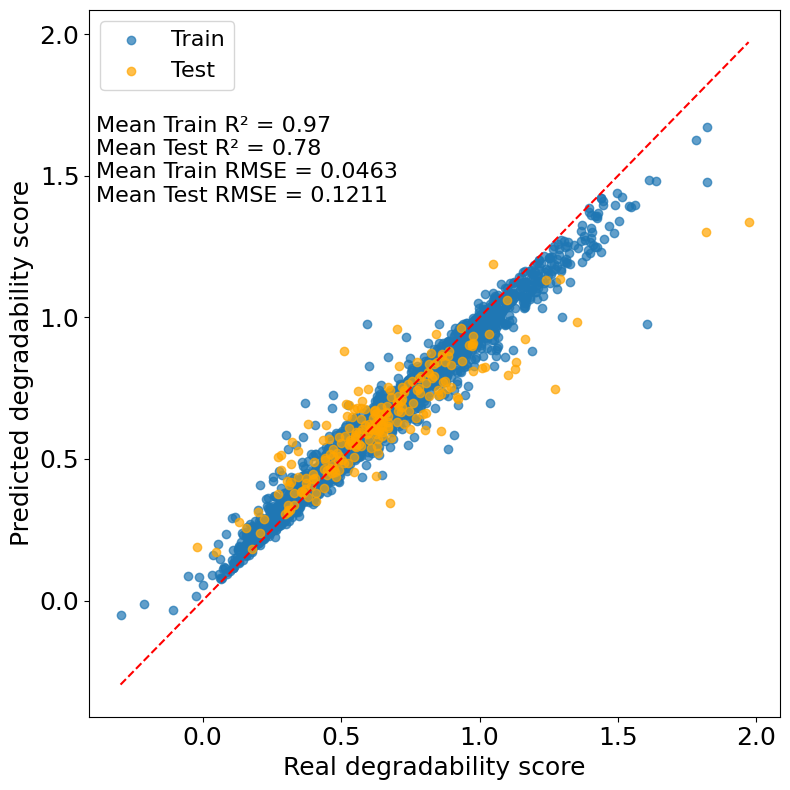

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming your data is already loaded in `data_ty`
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(df_degradability['morgan_fp_with_freq'].tolist(), df_degradability['Degradability'].tolist(), test_size=0.05, random_state=36)


rf = RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2,min_samples_leaf=1, random_state=42)

rf.fit(X_train, y_train)

# Predictions and Metrics for Training Data
y_train_pred = rf.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)

# Predictions and Metrics for Testing Data
y_test_pred = rf.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

# Plotting
plt.figure(figsize=(8, 8))
plt.scatter(y_train, y_train_pred, label='Train', alpha=0.7)
plt.scatter(y_test, y_test_pred, label='Test', alpha=0.7, color='orange')
plt.plot([min(y_train + y_test), max(y_train + y_test)], 
         [min(y_train + y_test), max(y_train + y_test)], 
         color='red', linestyle='--')


plt.text(0.01, 0.85, 
         f"Mean Train R² = {train_r2:.2f}\n"
         f"Mean Test R² = {test_r2:.2f}\n"
         f"Mean Train RMSE = {train_rmse:.4f}\n"
         f"Mean Test RMSE = {test_rmse:.4f}\n", 
         transform=plt.gca().transAxes, fontsize=16, verticalalignment='top')

plt.tick_params(axis='both', which='major', labelsize=18) 
plt.xlabel("Real degradability score", fontsize=18)
plt.ylabel("Predicted degradability score", fontsize=18)
plt.legend(fontsize=16)
#plt.grid(alpha=0.3)
plt.tight_layout()
#plt.show()
plt.savefig('d_score_pair_plot_v0404.jpg',dpi=400)
